In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import matplotlib
from sklearn.model_selection import train_test_split
import itertools

In [2]:
df_unemployment=pd.read_csv('Dataset\DP_LIVE_18042023124659745.csv')
df_unemployment.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,HUR,TOT,PC_LF,A,1967,1.875,NaN
1,AUS,HUR,TOT,PC_LF,A,1968,1.850,NaN
2,AUS,HUR,TOT,PC_LF,A,1969,1.800,NaN
3,AUS,HUR,TOT,PC_LF,A,1970,1.625,NaN
4,AUS,HUR,TOT,PC_LF,A,1971,1.925,NaN


In [3]:
df_unemployment_japan=df_unemployment[(df_unemployment['LOCATION']=='JPN')&(df_unemployment['SUBJECT']=='TOT')].copy()
df_unemployment_japan_men=df_unemployment[(df_unemployment['LOCATION']=='JPN')&(df_unemployment['SUBJECT']=='MEN')].copy()
df_unemployment_japan_women=df_unemployment[(df_unemployment['LOCATION']=='JPN')&
                                            (df_unemployment['SUBJECT']=='WOMEN')].copy()

In [4]:
df_unemployment_japan_monthly=df_unemployment_japan[df_unemployment_japan['TIME'].str.contains(r'\d{4}\-\d{2}',regex=True)]
df_unemployment_japan_men_monthly=df_unemployment_japan_men[df_unemployment_japan_men['TIME'].str.contains(r'\d{4}\-\d{2}',regex=True)]
df_unemployment_japan_women_monthly=df_unemployment_japan_women[df_unemployment_japan_women['TIME'].str.contains(r'\d{4}\-\d{2}',regex=True)]

In [5]:
[val for val in df_unemployment_japan_men_monthly['TIME'].to_list() if val not in df_unemployment_japan_monthly['TIME'].to_list()]

['1953-01',
 '1953-02',
 '1953-03',
 '1953-04',
 '1953-05',
 '1953-06',
 '1953-07',
 '1953-08',
 '1953-09',
 '1953-10',
 '1953-11',
 '1953-12',
 '1954-01',
 '1954-02',
 '1954-03',
 '1954-04',
 '1954-05',
 '1954-06',
 '1954-07',
 '1954-08',
 '1954-09',
 '1954-10',
 '1954-11',
 '1954-12']

In [6]:
df_unemployment_japan_men_monthly['TIME']=pd.to_datetime(df_unemployment_japan_men_monthly['TIME'],format='%Y-%m')
df_unemployment_japan_men_monthly=df_unemployment_japan_men_monthly.set_index('TIME')

In [7]:
df_unemployment_japan_men_monthly.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,Value,Flag Codes
TIME,,,,,,,
1953-01-01,JPN,HUR,MEN,PC_LF,M,1.9,NaN
1953-02-01,JPN,HUR,MEN,PC_LF,M,1.9,NaN
1953-03-01,JPN,HUR,MEN,PC_LF,M,1.9,NaN
1953-04-01,JPN,HUR,MEN,PC_LF,M,2.0,NaN
1953-05-01,JPN,HUR,MEN,PC_LF,M,2.1,NaN


# 1. Baseline Model : Time Series Forecasting

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b

In [8]:
X_train=df_unemployment_japan_men_monthly.iloc[0:800,0:5]
Y_train=df_unemployment_japan_men_monthly.iloc[0:800,5]

X_test=df_unemployment_japan_men_monthly.iloc[800:,0:5]
Y_test=df_unemployment_japan_men_monthly.iloc[800:,5]

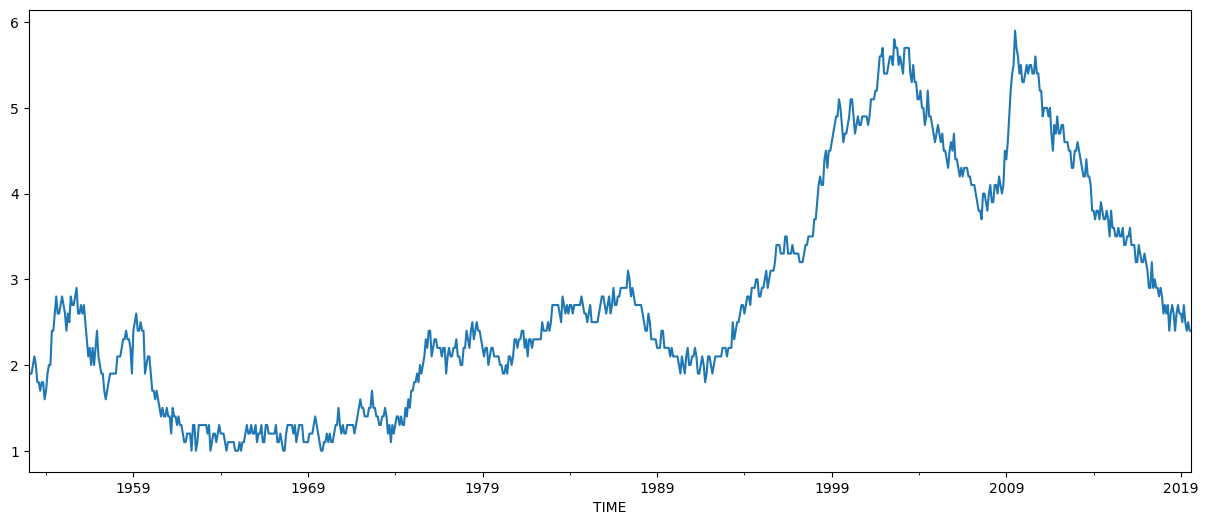

In [9]:
Y_train.plot(figsize=(15, 6))
plt.show()

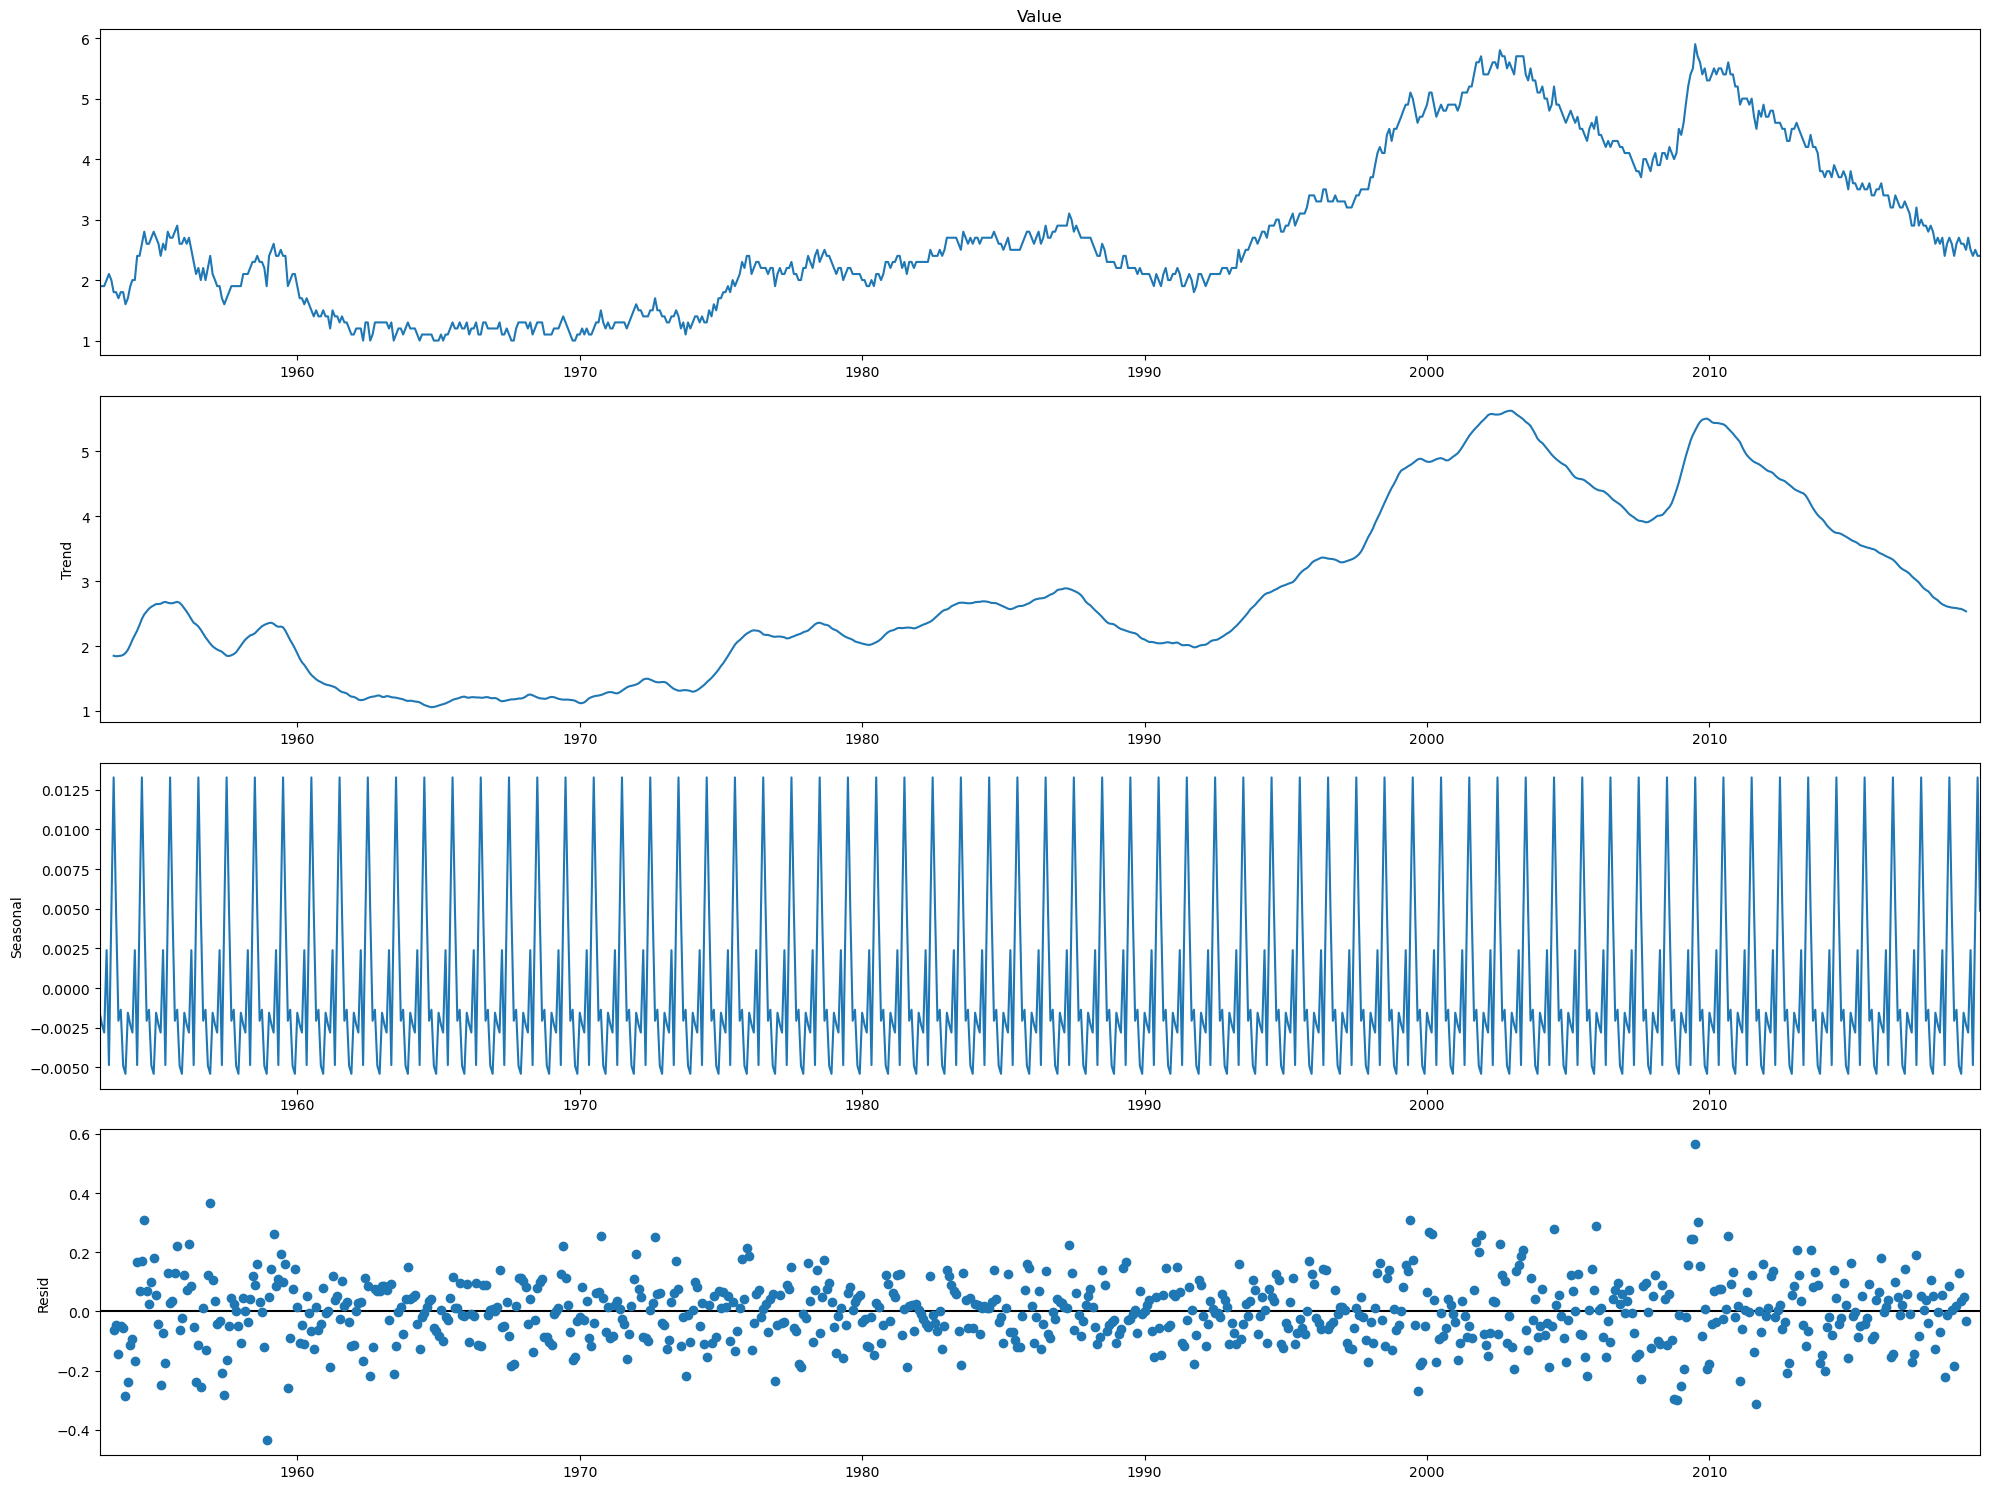

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
decomposition = sm.tsa.seasonal_decompose(Y_train, model='additive')
fig = decomposition.plot()
plt.show()

In [11]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [12]:
warnings.filterwarnings("ignore")
aic_value=99999
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(Y_train,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

        results = mod.fit()
        if results.aic<aic_value:
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic_value=results.aic

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4066.8858188153636
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3035.679221802793
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:768.9229997039411
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:683.9335664404734
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:680.6939598898128
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:201.03169181097704
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:176.3735908517586
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:176.16456859079435
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-1023.1757070067713
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-1082.123735161233
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:-1108.1362375480821
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:-1113.5103245775954
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:-1114.9676899951855


In [13]:
mod = sm.tsa.statespace.SARIMAX(Y_train,
                                order=(1, 1, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1196      0.034     -3.478      0.001      -0.187      -0.052
ar.S.L12       0.3193      0.067      4.745      0.000       0.187       0.451
ma.S.L12      -0.6799      0.054    -12.660      0.000      -0.785      -0.575
sigma2         0.0139      0.001     20.483      0.000       0.013       0.015


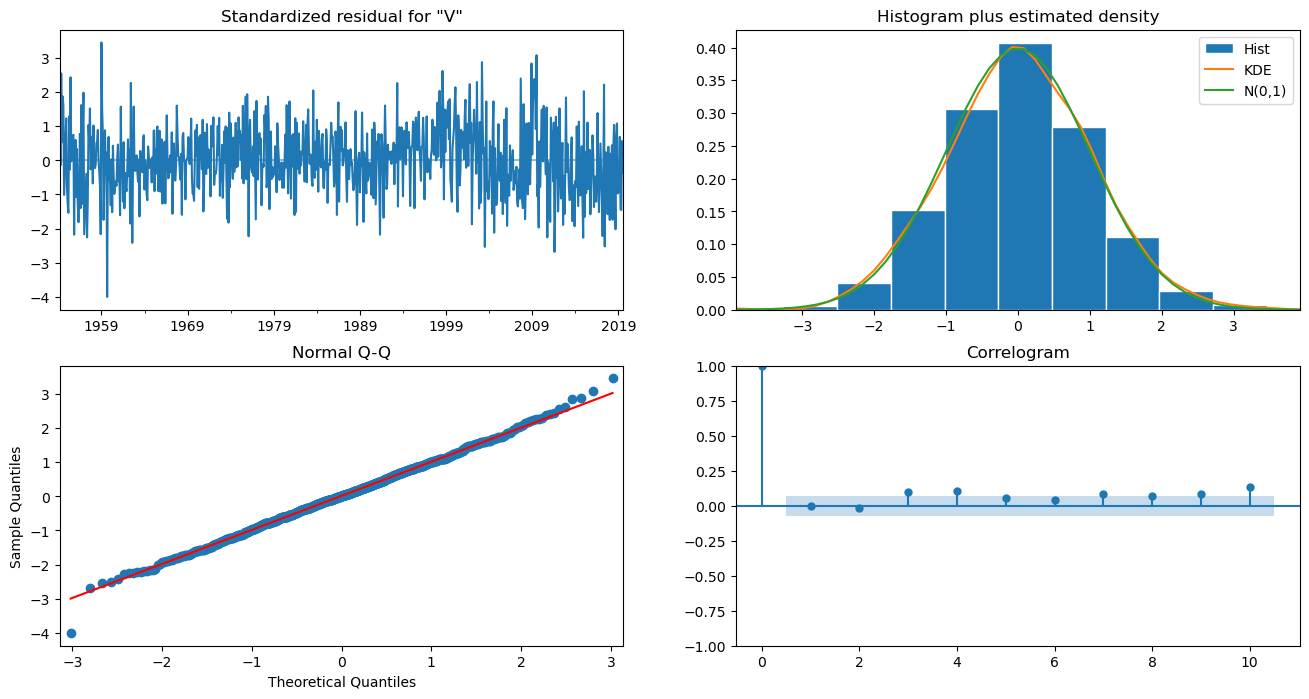

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [15]:
predictions={}
for date in Y_test.index:
    pred=results.get_prediction(pd.to_datetime(date))
    predictions[date]=pred.predicted_mean[0]

In [16]:
y_forecasted = np.array(list(predictions.values()))
y_truth = Y_test.values
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07
